# Portfolio Performance Analysis
This notebook analyzes a portfolio consisting of two futures contracts (E-mini S&P 500 and 10-Year Treasury Note). It calculates returns, volatility, Sharpe Ratio, and Information Ratio. Additionally, it visualizes the equity curve and rolling correlation between assets.

In [ ]:
# Import necessary libraries
import yfinance as yf  # Fetch market data
import matplotlib.pyplot as plt  # For data visualization
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.dates as mdates  # For formatting x-axis date labels


## Download Data
We fetch the historical prices for E-mini S&P 500 ("ES=F") and 10-Year Treasury Note ("ZN=F"), along with the risk-free rate (3-Month Treasury Bill Yield, "^IRX"). 

Instead of specifying a start date, we take all available data and handle missing values properly by:
- Forward-filling missing values to ensure continuity in the dataset.
- Dropping any remaining missing values at the beginning of the dataset.

In [ ]:
# Define the ticker symbols
tickers = ["ES=F", "ZN=F"]

# Download historical price data and handle missing values
prices = yf.download(tickers)["Close"].ffill().dropna()

# Download risk-free rate (3-month Treasury Bill yield)
risk_free_rate = yf.download("^IRX", start=prices.index[0])["Close"].ffill() / 100  # Convert percentage to decimal


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


# Visualizing the Risk-Free Rate Over Time

In this section, we plot the historical risk-free rate (3-Month Treasury Bill Yield) to observe its trends over time. 

### Steps in the Visualization:
- We use `matplotlib` to create a time-series plot of the risk-free rate.
- The x-axis represents the **years**, and the y-axis represents the **risk-free rate**.
- We format the x-axis to display **one tick per year** using `matplotlib.dates`.
- Labels, a title, and a legend are added for clarity.
- A **grid** is included to enhance readability.

This visualization helps us understand changes in the **risk-free rate**, which is important for calculating metrics like the **Sharpe ratio** in later steps.


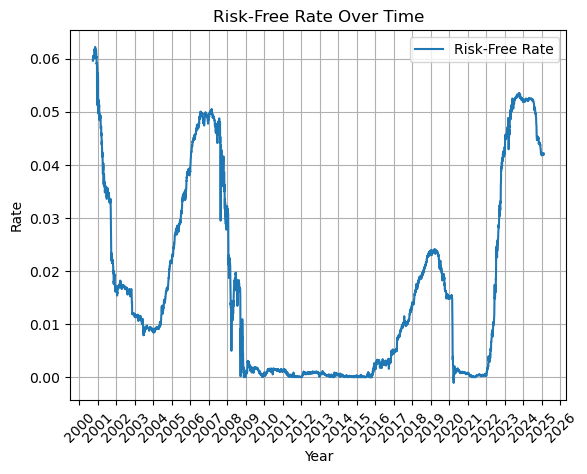

In [ ]:
# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Plot the risk-free rate with a blue line
ax.plot(risk_free_rate, label='Risk-Free Rate')
# Set the title of the plot
ax.set_title('Risk-Free Rate Over Time')

# Label the x-axis as 'Year'
ax.set_xlabel('Year')

# Label the y-axis as 'Rate'
ax.set_ylabel('Rate')

# Format the x-axis to show one tick per year
ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major tick locations to years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tick labels as years

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add grid lines for better visualization
ax.grid()

# Add a legend to indicate what the plotted line represents
ax.legend()

# Display the plot
plt.show()


## Compute Returns and Rolling Correlation
We compute percentage returns from price data and rolling correlation between the two assets over a one-year window (252 trading days).

In [ ]:
# Compute returns
returns = prices.pct_change().dropna()

# Compute rolling correlation with a 252-day window
rolling_corr = returns["ES=F"].rolling(252).corr(returns["ZN=F"])


# Cumulative Returns & Rolling Correlation

In this section, we visualize the cumulative returns of the **E-mini S&P 500 futures (ES)** and **10-Year Treasury Note futures (ZN)** alongside their **rolling correlation**. 

### Key Components:
- **Cumulative Returns**: Show the growth of $1 invested in ES and ZN futures.
- **Rolling Correlation**: A **252-day (1-year) rolling window** calculates the correlation between the two assets.

This plot helps analyze how the relationship between equities and bonds evolves over time.


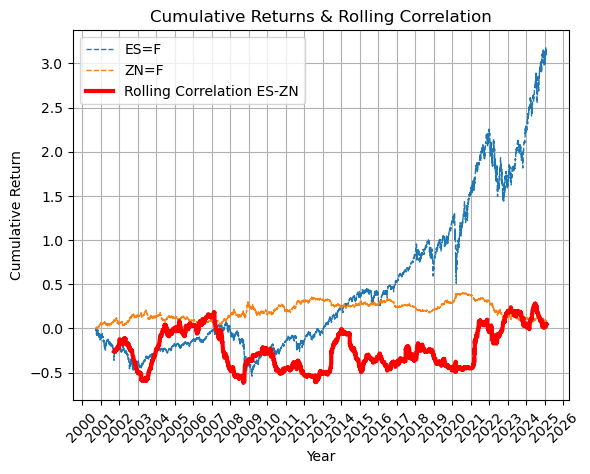

In [ ]:
# Create a figure and axis for plotting cumulative returns and rolling correlation
fig, ax = plt.subplots()

# Plot cumulative returns for ES futures contract with a dashed line
ax.plot(cum_returns.index, cum_returns["ES=F"] - 1, linestyle='--', linewidth=1, label='ES=F')

# Plot cumulative returns for ZN futures contract with a dashed line
ax.plot(cum_returns.index, cum_returns["ZN=F"] - 1, linestyle='--', linewidth=1, label='ZN=F')

# Plot rolling correlation between ES and ZN with a dotted red line
ax.plot(rolling_corr.index, rolling_corr, linewidth=3, label='Rolling Correlation ES-ZN', color='red')

# Set the title of the plot
ax.set_title('Cumulative Returns & Rolling Correlation')

# Label the x-axis as 'Year'
ax.set_xlabel('Year')

# Label the y-axis as 'Cumulative Return'
ax.set_ylabel('Cumulative Return')

# Add a legend to distinguish the different lines
ax.legend()

# Add grid lines for better visualization
ax.grid()

# Set x-axis ticks to show one per year
ax.xaxis.set_major_locator(mdates.YearLocator())

# Format x-axis labels as years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


# Cumulative Returns of ES, ZN, and 60-40 Portfolio

In this section, we compare the cumulative returns of **E-mini S&P 500 (ES)**, **10-Year Treasury Note (ZN)**, and a **60-40 portfolio** consisting of **60% ES and 40% ZN**.

### Key Components:
- **Cumulative Returns**: Show how ES, ZN, and the 60-40 portfolio have grown over time.
- **Portfolio Construction**:
  - The **60-40 portfolio** is created using a weighted sum of ES and ZN returns.
  - The **portfolio return** is calculated and compounded to derive cumulative performance.
- **Plot Customization**:
  - ES and ZN are displayed as **dashed lines**.
  - The **60-40 portfolio is shown as a thicker line** to emphasize its performance.
  - The x-axis shows **one tick per year**, and labels are **rotated 45 degrees** for readability.

This visualization helps evaluate the performance of a balanced portfolio compared to individual assets.


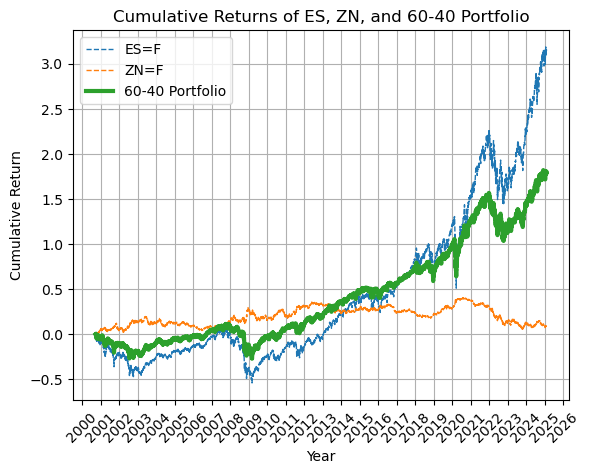

In [ ]:
# Create a figure and axis for plotting cumulative returns of ES, ZN, and 60-40 portfolio
fig, ax = plt.subplots()

# Plot cumulative returns for ES futures contract with a dashed line
ax.plot(cum_returns.index, cum_returns["ES=F"] - 1, linestyle='--', linewidth=1, label='ES=F')

# Plot cumulative returns for ZN futures contract with a dashed line
ax.plot(cum_returns.index, cum_returns["ZN=F"] - 1, linestyle='--', linewidth=1, label='ZN=F')

# Plot cumulative returns for the 60-40 portfolio with a thicker line
ax.plot(cum_portfolio_returns.index, cum_portfolio_returns - 1, linewidth=3, label='60-40 Portfolio')

# Set the title of the plot
ax.set_title('Cumulative Returns of ES, ZN, and 60-40 Portfolio')

# Label the x-axis as 'Year'
ax.set_xlabel('Year')

# Label the y-axis as 'Cumulative Return'
ax.set_ylabel('Cumulative Return')

# Add a legend to distinguish the different lines
ax.legend()

# Add grid lines for better visualization
ax.grid()

# Set x-axis ticks to show one per year
ax.xaxis.set_major_locator(mdates.YearLocator())

# Format x-axis labels as years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
# Compute annualized mean return (assuming 252 trading days in a year)
annualized_mean = returns.mean() * 252

# Compute annualized volatility (standard deviation of returns scaled by sqrt(252))
annualized_vol = returns.std() * np.sqrt(252)

# Compute downside volatility (only considering negative returns)
downside_returns = returns[returns < 0]  # Filter negative returns
downside_vol = downside_returns.std() * np.sqrt(252)  # Annualize the downside volatility

# Compute Sharpe Ratio (excess return over risk-free rate divided by volatility)
excess_return = annualized_mean - risk_free_rate.mean().iloc[0]
sharpe_ratio = excess_return / annualized_vol

# Compute Information Ratio (mean return divided by volatility)
information_ratio = annualized_mean / annualized_vol

# Compute Maximum Drawdown (largest peak-to-trough decline)
cumulative_returns = (1 + returns).cumprod()
rolling_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# Print computed metrics
print(f"Annualized Mean Return: {annualized_mean.mean():.1%}")
print(f"Annualized Volatility: {annualized_vol.mean():.1%}")
print(f"Downside Volatility: {downside_vol.mean():.1%}")
print(f"Sharpe Ratio: {sharpe_ratio.mean():.1f}")
print(f"Information Ratio: {information_ratio.mean():.1f}")
print(f"Maximum Drawdown: {max_drawdown.min():.1%}")


Annualized Mean Return: 4.1%
Annualized Volatility: 12.8%
Downside Volatility: 10.0%
Sharpe Ratio: 0.1
Information Ratio: 0.2
Maximum Drawdown: -57.1%
